In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import seaborn as sns

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = {'min': -90, 'max': 90}
lng_range = {'min': -180, 'max': 180}

lat_values = np.arange(lat_range['min'], lat_range['max'], 0.01)
lng_values = np.arange(lng_range['min'], lng_range['max'], 0.01)

## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:

    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(len(cities))

585


In [83]:
column_names = ('City Name', 'Country Code', 'Rand Lat', 'Rand Lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_chart_df = pd.DataFrame(columns = column_names)
cities_chart_df

,City Name,Country Code,Rand Lat,Rand Lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


## Perform API Calls

In [84]:
api_key = "693516eb20bebd96f0f6599394a1260e"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
units = "impirial"

query_url = url +"&units=" + units + "&q="
'''
response = requests.get(query_url + 'atlanta')
jpull = response.json()
print(jpull['sys']['country'])
'''

"\nresponse = requests.get(query_url + 'atlanta')\njpull = response.json()\nprint(jpull['sys']['country'])\n"

In [85]:
search_data = []
city_List = []
country_List = []


searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

for city in cities:
    try:
        print(f"Processing record {searchCnt} for the city: {city}")
        searchCnt += 1
        response = requests.get(query_url + city)
        jpull = response.json()
        countryyyy = jpull['sys']['country']
        searchCityID = jpull['id']
        search_data.append(jpull)
        city_List.append(city)
        country_List.append(countryyyy)
        print(f"Record found for city: {city} with city id: {searchCityID}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass


print("---------------------------------------")
print("Processing Complete")


Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 0 for the city: yellowknife
Record found for city: yellowknife with city id: 6185377
Processing record 1 for the city: caravelas
Record found for city: caravelas with city id: 3466980
Processing record 2 for the city: nome
Record found for city: nome with city id: 4732862
Processing record 3 for the city: harper
Record found for city: harper with city id: 4696310
Processing record 4 for the city: ushuaia
Record found for city: ushuaia with city id: 3833367
Processing record 5 for the city: provideniya
Record found for city: provideniya with city id: 4031574
Processing record 6 for the city: dyurtyuli
Record found for city: dyurtyuli with city id: 563719
Processing record 7 for the city: vila franca do campo
Record found for city: vila franca do campo with city id: 3372472
Processing record 8 for the city: mount gambier
Record found for city: mount gambier with city id: 2156643
Processing r

Record found for city: calama with city id: 3897347
Processing record 84 for the city: maghama
No weather record found for city: maghama
Processing record 85 for the city: gizo
Record found for city: gizo with city id: 6693679
Processing record 86 for the city: nuuk
Record found for city: nuuk with city id: 3421319
Processing record 87 for the city: umzimvubu
No weather record found for city: umzimvubu
Processing record 88 for the city: xudat
Record found for city: xudat with city id: 586001
Processing record 89 for the city: kruisfontein
Record found for city: kruisfontein with city id: 986717
Processing record 90 for the city: tsagan aman
Record found for city: tsagan aman with city id: 481117
Processing record 91 for the city: pangkalanbuun
Record found for city: pangkalanbuun with city id: 1632694
Processing record 92 for the city: hithadhoo
Record found for city: hithadhoo with city id: 1282256
Processing record 93 for the city: shibata
Record found for city: shibata with city id:

Record found for city: kindu with city id: 212902
Processing record 170 for the city: atuona
Record found for city: atuona with city id: 4020109
Processing record 171 for the city: barentsburg
No weather record found for city: barentsburg
Processing record 172 for the city: fort nelson
Record found for city: fort nelson with city id: 5955902
Processing record 173 for the city: talara
Record found for city: talara with city id: 3691582
Processing record 174 for the city: antalaha
Record found for city: antalaha with city id: 1071296
Processing record 175 for the city: moroni
Record found for city: moroni with city id: 5543462
Processing record 176 for the city: mgandu
Record found for city: mgandu with city id: 154097
Processing record 177 for the city: uruzgan
Record found for city: uruzgan with city id: 1131462
Processing record 178 for the city: amahai
Record found for city: amahai with city id: 1651591
Processing record 179 for the city: luzhou
Record found for city: luzhou with cit

Record found for city: ilulissat with city id: 3423146
Processing record 254 for the city: bathsheba
Record found for city: bathsheba with city id: 3374083
Processing record 255 for the city: port elizabeth
Record found for city: port elizabeth with city id: 4501427
Processing record 256 for the city: banamba
Record found for city: banamba with city id: 2460546
Processing record 257 for the city: taoudenni
Record found for city: taoudenni with city id: 2450173
Processing record 258 for the city: beisfjord
Record found for city: beisfjord with city id: 3144987
Processing record 259 for the city: umm lajj
Record found for city: umm lajj with city id: 100926
Processing record 260 for the city: santa eulalia del rio
No weather record found for city: santa eulalia del rio
Processing record 261 for the city: la union
Record found for city: la union with city id: 3593500
Processing record 262 for the city: batemans bay
Record found for city: batemans bay with city id: 2176639
Processing recor

Record found for city: suntar with city id: 2015913
Processing record 337 for the city: sturgis
Record found for city: sturgis with city id: 5769489
Processing record 338 for the city: fairbanks
Record found for city: fairbanks with city id: 5861897
Processing record 339 for the city: codrington
Record found for city: codrington with city id: 2160063
Processing record 340 for the city: andselv
No weather record found for city: andselv
Processing record 341 for the city: bouna
Record found for city: bouna with city id: 2290849
Processing record 342 for the city: humboldt
Record found for city: humboldt with city id: 5978404
Processing record 343 for the city: spirit river
Record found for city: spirit river with city id: 6153766
Processing record 344 for the city: sakaiminato
Record found for city: sakaiminato with city id: 1853174
Processing record 345 for the city: starobaltachevo
Record found for city: starobaltachevo with city id: 488881
Processing record 346 for the city: komsomols

Record found for city: rosetta with city id: 350203
Processing record 422 for the city: abu samrah
Record found for city: abu samrah with city id: 172515
Processing record 423 for the city: marcona
No weather record found for city: marcona
Processing record 424 for the city: boueni
Record found for city: boueni with city id: 1090467
Processing record 425 for the city: verkhoyansk
Record found for city: verkhoyansk with city id: 2013465
Processing record 426 for the city: belmonte
Record found for city: belmonte with city id: 8010472
Processing record 427 for the city: formosa
Record found for city: formosa with city id: 3433899
Processing record 428 for the city: saint-joseph
Record found for city: saint-joseph with city id: 3037456
Processing record 429 for the city: jacareacanga
Record found for city: jacareacanga with city id: 3397763
Processing record 430 for the city: devils lake
Record found for city: devils lake with city id: 5058868
Processing record 431 for the city: ballybofe

No weather record found for city: falealupo
Processing record 508 for the city: sataua
No weather record found for city: sataua
Processing record 509 for the city: kavaratti
Record found for city: kavaratti with city id: 1267390
Processing record 510 for the city: santa vitoria do palmar
Record found for city: santa vitoria do palmar with city id: 3449747
Processing record 511 for the city: kawalu
Record found for city: kawalu with city id: 1640902
Processing record 512 for the city: usinsk
Record found for city: usinsk with city id: 863061
Processing record 513 for the city: bokoro
No weather record found for city: bokoro
Processing record 514 for the city: red wing
Record found for city: red wing with city id: 5042773
Processing record 515 for the city: flin flon
Record found for city: flin flon with city id: 5954718
Processing record 516 for the city: kostomuksha
Record found for city: kostomuksha with city id: 543899
Processing record 517 for the city: bam
Record found for city: ba

In [77]:
len(search_data)

533

In [78]:
lat_info =  [data.get("coord").get("lat") for data in search_data]
lng_info = [data.get("coord").get("lon") for data in search_data]
temp_info = [data.get("main").get("temp") for data in search_data]
humid_info = [data.get("main").get("humidity") for data in search_data]
cloud_info =[data.get("clouds").get("all") for data in search_data]
wind_info = [data.get("wind").get("speed") for data in search_data]

In [79]:
weather_info = pd.DataFrame({"cityName":city_List,
                            "country":country_List,
                            "lat":lat_info,
                            "lng":lng_info,
                            "temp":temp_info,
                            "humidity":humid_info,
                            "cloudiness":cloud_info,
                            "winds":wind_info})

In [80]:
weather_info = weather_info[["cityName","country","lat","lng","temp","humidity","cloudiness","winds"]]
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 8 columns):
cityName      533 non-null object
country       533 non-null object
lat           533 non-null float64
lng           533 non-null float64
temp          533 non-null float64
humidity      533 non-null int64
cloudiness    533 non-null int64
winds         533 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 33.4+ KB


In [87]:
weather_info.head()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds
0,eureka,US,40.80,-124.16,42.96,96,90,2.28
1,saint-philippe,CA,45.36,-73.48,43.90,52,20,10.29
2,avarua,CK,-21.21,-159.78,71.60,73,20,10.29
3,busselton,AU,-33.64,115.35,58.16,100,44,16.04
4,kristiansund,NO,63.12,7.73,48.20,57,75,33.33


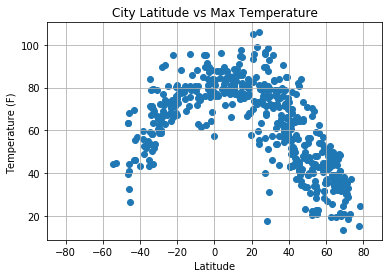

In [91]:

# Latitude vs Max Temp
plt.scatter(weather_info["lat"], weather_info["temp"], marker="o")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()

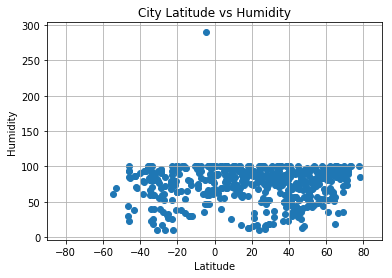

In [92]:
# Latitude vs Humidity
plt.scatter(weather_info["lat"], weather_info["humidity"], marker="o")

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

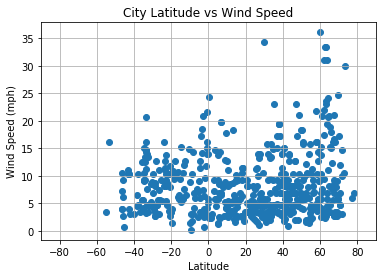

In [93]:
# Latitude vs Wind Speed
plt.scatter(weather_info["lat"], weather_info["winds"], marker="o")

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()